# SAMURAI Tutorial

---

This interactive tutorial takes you through the steps of how to run SAMURAI. SAMURAI is a variational analysis technique developed based primarily on the work of Ooyama (1987), Ooyama (2002) and Gao et al.(2004). The SAMURAI analysis yields a maximum likelihood estimate of the atmospheric state for a given set of observations and error estimates by minimizing a variational cost function.

---


## Tutorial Overview

### 1. Setup 

#### Directory organization 

<div>
<img src="../images/wind_structure.png" width="500"/>
</div>

#### Download desired input data, a parameter file, and a center file:

**a. QC-ed radar data files will be downloaded in this example:**
* cfrad.20080702_230459.000_to_20080702_230948.000_CSU-PAWN_PPI.nc
* cfrad.20080702_230527.000_to_20080702_230946.000_CSU-CHIL_PPI.nc

*The QC process is not included in this tutorial. Further QC details can be found on **??** *

**b. Center file:**

*Note: The .cen file was generated by the .pl script*
* Generate_center.pl
* 20080702.cen


**c. Parameter file:**
* samurai_params

*Note: The parameter file have already been modified to run straight out of the box.*

#### Environment and packages¶

First, we import the required python packages to run this notebook. Most of the LROSE processing can be done with the os package and shell commands. 

In [35]:
import os
#### Need to modify later
os.environ['BASE_DIR'] = '/home/jovyan/ams2023'
os.environ['LROSE_DIR'] = '/usr/local/lrose/bin'
base_dir = os.environ['BASE_DIR']
!echo "Base directory: "$BASE_DIR

Base directory: /home/jovyan/ams2023


We will download the required data and organize the directory by performing the following commands:

In [36]:
# make a directory for all the data files in the echo tutorial (raw and analysis)
!rm -rf ${BASE_DIR}/data/wind
!mkdir ${BASE_DIR}/data/wind


## make subdirectory within data for input and output directory
!rm -rf ${BASE_DIR}/data/wind/input
!mkdir ${BASE_DIR}/data/wind/input

!rm -rf ${BASE_DIR}/data/wind/output_sam
!mkdir ${BASE_DIR}/data/wind/output_sam

# ## wget raw files from EOL server ###need to modify
# !wget http://front.eol.ucar.edu/data/notebooks/ams2023/gfsanl_4_2018091418.g2.tar
# !wget http://front.eol.ucar.edu/data/notebooks/ams2023/KMHX20180914_191822_V06.ar2v

# ## move files to proper directory
!mv cfrad1 ${BASE_DIR}/data/wind/input
!mv cfrad2 ${BASE_DIR}/data/wind/input
!mv 20080702.cen ${BASE_DIR}/data/wind/input

mkdir: cannot create directory ‘/home/jovyan/ams2023/data/wind’: No such file or directory
mkdir: cannot create directory ‘/home/jovyan/ams2023/data/wind/input’: No such file or directory
mkdir: cannot create directory ‘/home/jovyan/ams2023/data/wind/output_sam’: No such file or directory
mv: cannot stat 'cfrad1': No such file or directory
mv: cannot stat 'cfrad2': No such file or directory
mv: cannot stat '20080702.cen': No such file or directory
mv: cannot stat 'Generate_center.pl': No such file or directory


### 2. Prepare data for analysis

In this tutorial, the provided data have been QC-ed. For a standard procedure, users are recommended to perform the following procedure:

* Convert radar data from level 2 to CfRadial. 
    - SAMURAI can read several ext data formats commonly used for aircraft observations. All data files in the <code lang="bash">intput</code> directory will be included in the analysis. The read subroutine for each datatype is determined by the file suffix.
        - frd = Dropsonde format used by HRD
        - cls = Dropsonde format used by older versions of ASPEN
        - sec = 1 second flight level data format used by HRD
        - ten = 10 second flight level data format used by USAF
        - swp = Doppler radar format used by NCAR/EOL
        - sfmr = Custom format for SFMR data
        - Wwind = Dropsonde format used by some versions of ASPEN (modified CLASS) 
        - eol = Dropsonde format used by most recent version of ASPEN (modified CLASS) 
        - qscat = Custom format for QUIKSCAT data
        - ascat = Custom format for ASCAT data
        - nopp = Custom format for NOPP scatterometer products
        - cimss = Atmospheric motion vector format used by CIMSS/Wisconsin
        - dwl = Doppler lidar format used by Simpsons Weather Associates
        - insitu = Custom format for insitu observations

* Quality-controlled raw data by desired QC-tools. For example: HawkEdit, PyArt..etc.

* Execute the center perl script to generate a time-series of center location by providing an estimation of the moving speed of the target and the reference location. The .cen file will be generated by typing the following command into a terminal:
<code lang="bash">./Generate_center.pl</code>

* Modify the parameter file
    - Parameter files modifications
---
* **BACKGROUND SECTION**
    * load_background [line 107]
        * TRUE: pseudo-observations stored in the <code lang="bash">samurai_Background.in</code> will be loaded
        * FALSE (default setting)
    * adjust_background [line 132]
        * TRUE: the pseudo-observations will be adjusted to satisfy the mass continuity and match the supplied data exactly.
* **OPERATION SECTION**
    * mode [line 170]: select the desired output coordinate system (MODE_XYZ or MODE_RTZ)
    * projection [line 185]
    * data_directory [line 197]
    * output_directory [line 209]
    * preprocess_obs [line 219]
        * TRUE: the raw data files will be preprocessed according to their file suffixes, and a <code lang="bash">samurai_Observations.in</code> file will be generated.
        * FALSE: SAMURAI will load the observations from the <code lang="bash">samurai_Observations.in</code> file located in the data_directory 
    * num_iterations [line 232]
* **GRID DEFINITION SECTION**
    * i_min [line 302]
    * i_max [line 310]
    * i_incr [line 318]
    * j_min [line 326]
    * j_max [line 334]
    * j_incr [line 342]
    * k_min [line 350]
    * k_max [line 358]
    * k_incr [line 366]
* **BACKGROUND SECTION**
    * ref_state [line 380]: a sounding file to define the hydrostatic reference state used in the analysis. The default is the Dunion (2011) moist tropical sounding file. 
    * ref_time [line 392]
    * i_background_roi [line 402]
    * j_background_roi [line 412]
* **RADAR SECTION**
    * radar_skip [line 426]: This option can be used to skip beams in the radar data. When set to '1', all beams are used. 
    * radar_stride [line 434]: This optionsets thenumberofgates overwhichaveragingoccurs alongthebeam.Astrideof'1'uses alldata,and higher numbers average multiple gates of the given stride. 
    * qr_variable [line 452]: In the default 'dbz' mode, the reflectivity is objectively analyzed and not included in the cost function. If this is set to 'qr', then reflectivity is converted to liquid water using Z-M relationships defined in Gamache et al. (1993) and used as an additional variable in the cost function minimization. 
    * radar_dbz [line 464]: The name of the reflectivity field in the radar data.
    * radar_vel [line 476]: The name of the Doppler velocity field in the radar data.
    * radar_sw [line 484]: The name of the spectrum width field in the radar data.
    * i_reflectivity_roi [line 492], j_reflectivity_roi [line 500], k_reflectivity_roi [line 508]
    * dbz_pseudow_weight [line 516]
    * mask_reflectivity [line 524]: The analysis can be set to missing data where there is no reflectivity. If set to 'None' then no masking is performed. A numerical value will be used as a threshold for the masking, with all data at nodes having less than the given reflectivity value removed.
    * melting_zone_width [line 532], mixed_phase_dbz [line 540], rain_dbz [line 548]
* **BOUNDARY CONDITIONS SECTION**

Available options are R0, R1T0, R1T1, R1T2, R2T10, R2T20, R3, and PERIODIC following Ooyama (2002). The default "non"- boundary condition (R0) adds a buffer set of gridpoints that are used to calculate the solution but are discarded for output. Different boundary conditions can be set on the left (L) or right (R) side of the domain for each variable and dimension. The most common option other than R0 would be R1T0 for vertical velocity (rhow = 0) at the surface and/or domain top. Periodic domains are only valid for the i and j dimension, but are available in both the XYZ and RTZ mode.
* **OBSERVATION ERRORS SECTION**

Specified error is given in terms of a standard deviation, and is fixed for all observations from a particular instrument except radar. In the radar case, the spectrum width and elevation angle are used to define the error for each radar gate.Aminimum error (radarminerror) is also enforced.
* **ITERATION DEPENDENT SECTION**
    * mc_weight [line 1450]: specify the weight given to the mass continuity constraint. Default is set to 1. 
    * i_filter_length [line 1546], j_filter_length [line 1558], k_filter_length [line 1570]
     - Gaussian recursive filter is a low-pass filter. Smaller filter lengths retain more detail, and larger filter lengths smooth more. 
    * i_spline_cutoff [line 1582], j_spline_cutoff [line 1594], k_spline_cutoff [line 1606]
     - Spline cutoff is implemented as a third derivative constraint on the cubic B-spline basis during the spline transform.
    * i_max_wavenumber [line 1618], j_max_wavenumber [line 1630], k_max_wavenumber [line 1642]
     - Fourier spectral filter is mainly used for removing high-wavenumber features in the spectral domain and axisymmetric type of analysis.









### 3. Run SAMURAI

After modifying the parameter file, directing to the parameter file by typing the *-params* flags

In [8]:
!${LROSE_DIR}/samurai -params ${BASE_DIR}/params/wind/samurai_params 

/bell-scratch/community/bin//samurai: error while loading shared libraries: libkd.so: cannot open shared object file: No such file or directory


### 4. Plot SAMURAI results

#### Environment and packages¶
Import the packages to plot the SAMURAI output

In [37]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import xarray as xr
import matplotlib as mpl
import cartopy.crs as ccrs
from metpy.plots import ctables
mpl.rcParams['figure.dpi'] = 300

#### Load the netcdf file

In [24]:
inDir = base_dir+"/data/wind/output_sam/"
file = "samurai_XYZ_analysis.nc"
ds_radar = xr.open_dataset(inDir+file).squeeze()
ds_radar.load()

<xarray.Dataset>
Dimensions:     (longitude: 71, latitude: 71, altitude: 30)
Coordinates:
  * longitude   (longitude) float32 -104.5 -104.5 -104.4 ... -104.1 -104.0
  * latitude    (latitude) float32 40.58 40.59 40.59 40.59 ... 40.89 40.89 40.9
  * altitude    (altitude) float32 0.0 0.5 1.0 1.5 2.0 ... 13.0 13.5 14.0 14.5
    time        datetime64[ns] 2008-07-02T23:04:59
Data variables: (12/53)
    x           (longitude) float32 15.0 15.5 16.0 16.5 ... 48.5 49.0 49.5 50.0
    y           (latitude) float32 15.0 15.5 16.0 16.5 ... 48.5 49.0 49.5 50.0
    U           (altitude, latitude, longitude) float32 nan nan nan ... nan nan
    V           (altitude, latitude, longitude) float32 nan nan nan ... nan nan
    W           (altitude, latitude, longitude) float32 nan nan nan ... nan nan
    WSPD        (altitude, latitude, longitude) float32 nan nan nan ... nan nan
    ...          ...
    DQVDZ       (altitude, latitude, longitude) float32 nan nan nan ... nan nan
    DPDZ        (altitude, latitude, longitude) float32 nan nan nan ... nan nan
    DRHODX      (altitude, latitude, longitude) float32 nan nan nan ... nan nan
    DRHODY      (altitude, latitude, longitude) float32 nan nan nan ... nan nan
    DRHODZ      (altitude, latitude, longitude) float32 nan nan nan ... nan nan
    MCRESIDUAL  (altitude, latitude, longitude) float32 -0.08769 ... -0.1795

In [21]:
## Get variables:
da_DBZ = ds_radar['DBZ']
da_U = ds_radar['U']
da_V = ds_radar['V']
da_W = ds_radar['W']

lon, lat = np.meshgrid( ds_radar.longitude, ds_radar.latitude )

Text(0.5, -0.1, '[dBZ]')

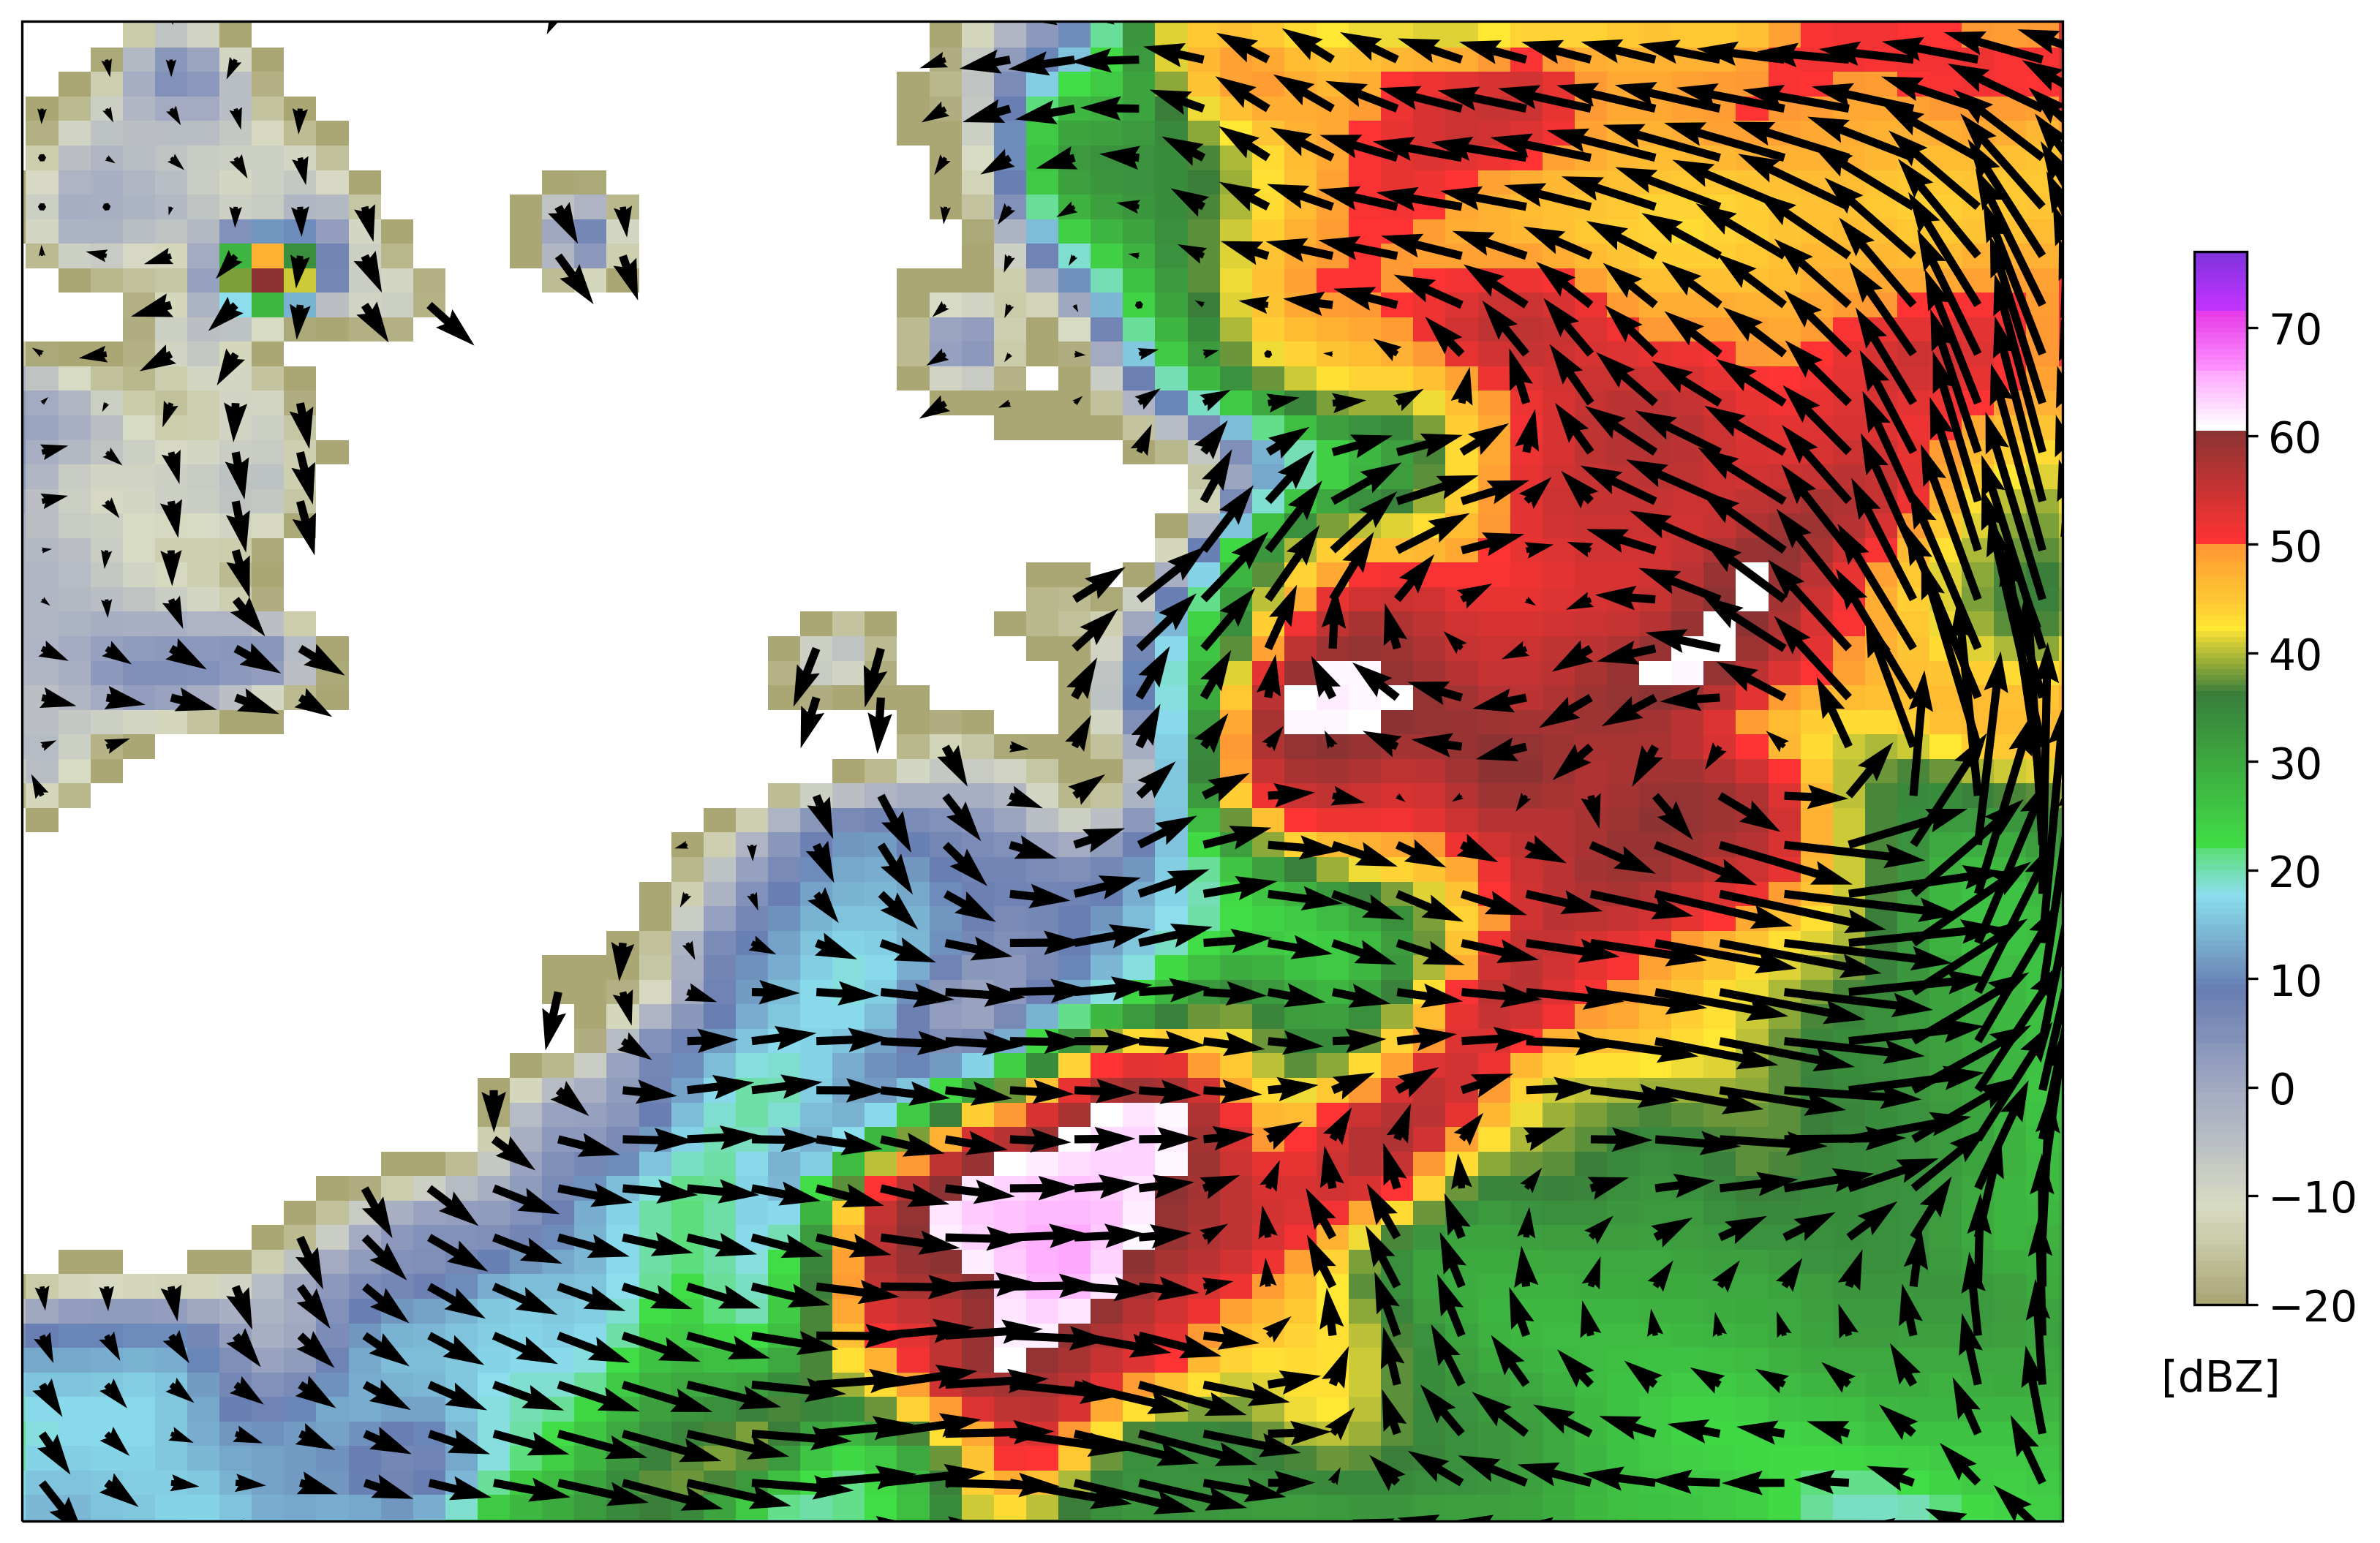

In [23]:
## Set NWS reflectivity colorbar:
ref_norm, ref_cmap = ctables.registry.get_with_steps('NWSStormClearReflectivity', -20, 0.5)
plotting_alt=3 # altitude at 3 km
plotting_var = ds_radar.DBZ.sel(altitude=plotting_alt)
plotting_var_u = ds_radar.U.sel(altitude=plotting_alt).data
plotting_var_v = ds_radar.V.sel(altitude=plotting_alt).data
plotting_lon = ds_radar.longitude
plotting_lat = ds_radar.latitude

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.PlateCarree())
# stamen_terrain = cimgt.Stamen('terrain')
# ax.add_image(stamen_terrain, 8)
    
ext = 0.02    
ax.set_extent([np.min(lon)+ext, np.max(lon)-ext, np.min(lat)+ext, np.max(lat)-ext], crs=ccrs.PlateCarree())
    
cf1 = ax.pcolormesh( plotting_lon, plotting_lat, plotting_var
                    , cmap=ref_cmap, norm=ref_norm
                    , alpha=0.8
                    , shading='auto'
                    , transform=ccrs.PlateCarree() 
                    )
step = 2
cf_q = ax.quiver( plotting_lon[::step], plotting_lat[::step]
                    , plotting_var_u[::step, ::step], plotting_var_v[::step, ::step]
                    , scale=200
                    , width=0.004
                    , color='k'
                    , transform=ccrs.PlateCarree() 
                    )
cbar_ax = fig.add_axes([0.95, 0.3, 0.02, 0.4])
cbar = fig.colorbar(cf1, cax=cbar_ax, fraction=0.04)
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_title('[dBZ]', fontsize=14, y=-0.1)

#### Apply FRACTL conditionNumber to throw out the retrievals over bad geometry area

In [26]:
# Read file into radar object
inDir = base_dir+"/data/wind/output_frac/20080702/"
file = "ncf_20080702_230948.nc"
ds_radar_f = xr.open_dataset(inDir+file).squeeze()
ds_radar_f

<xarray.Dataset>
Dimensions:          (z0: 30, y0: 71, x0: 71)
Coordinates:
    time             datetime64[ns] 2008-07-02T23:09:48
  * z0               (z0) float64 0.0 500.0 1e+03 ... 1.35e+04 1.4e+04 1.45e+04
  * y0               (y0) float64 1.5e+04 1.55e+04 1.6e+04 ... 4.95e+04 5e+04
  * x0               (x0) float64 1.5e+04 1.55e+04 1.6e+04 ... 4.95e+04 5e+04
Data variables: (12/14)
    grid_mapping_0   int32 ...
    lat0             (y0, x0) float64 ...
    lon0             (y0, x0) float64 ...
    start_time       float64 ...
    stop_time        float64 ...
    W                (z0, y0, x0) float32 ...
    ...               ...
    DBZ              (z0, y0, x0) float32 ...
    NCP              (z0, y0, x0) float32 ...
    conditionNumber  (z0, y0, x0) float32 ...
    W_std            (z0, y0, x0) float32 ...
    V_std            (z0, y0, x0) float32 ...
    U_std            (z0, y0, x0) float32 ...
Attributes:
    Conventions:  CF-1.5

In [27]:
plotting_CN = ds_radar_f.conditionNumber.sel(z0=3.0*1000)

In [33]:
CN_threshold = 10
dbz_goodcondition = np.where(plotting_CN < CN_threshold, plotting_var, np.nan)
u_goodcondition = np.where(plotting_CN < CN_threshold, plotting_var_u, np.nan)
v_goodcondition = np.where(plotting_CN < CN_threshold, plotting_var_v, np.nan)

Text(0.5, -0.1, '[dBZ]')

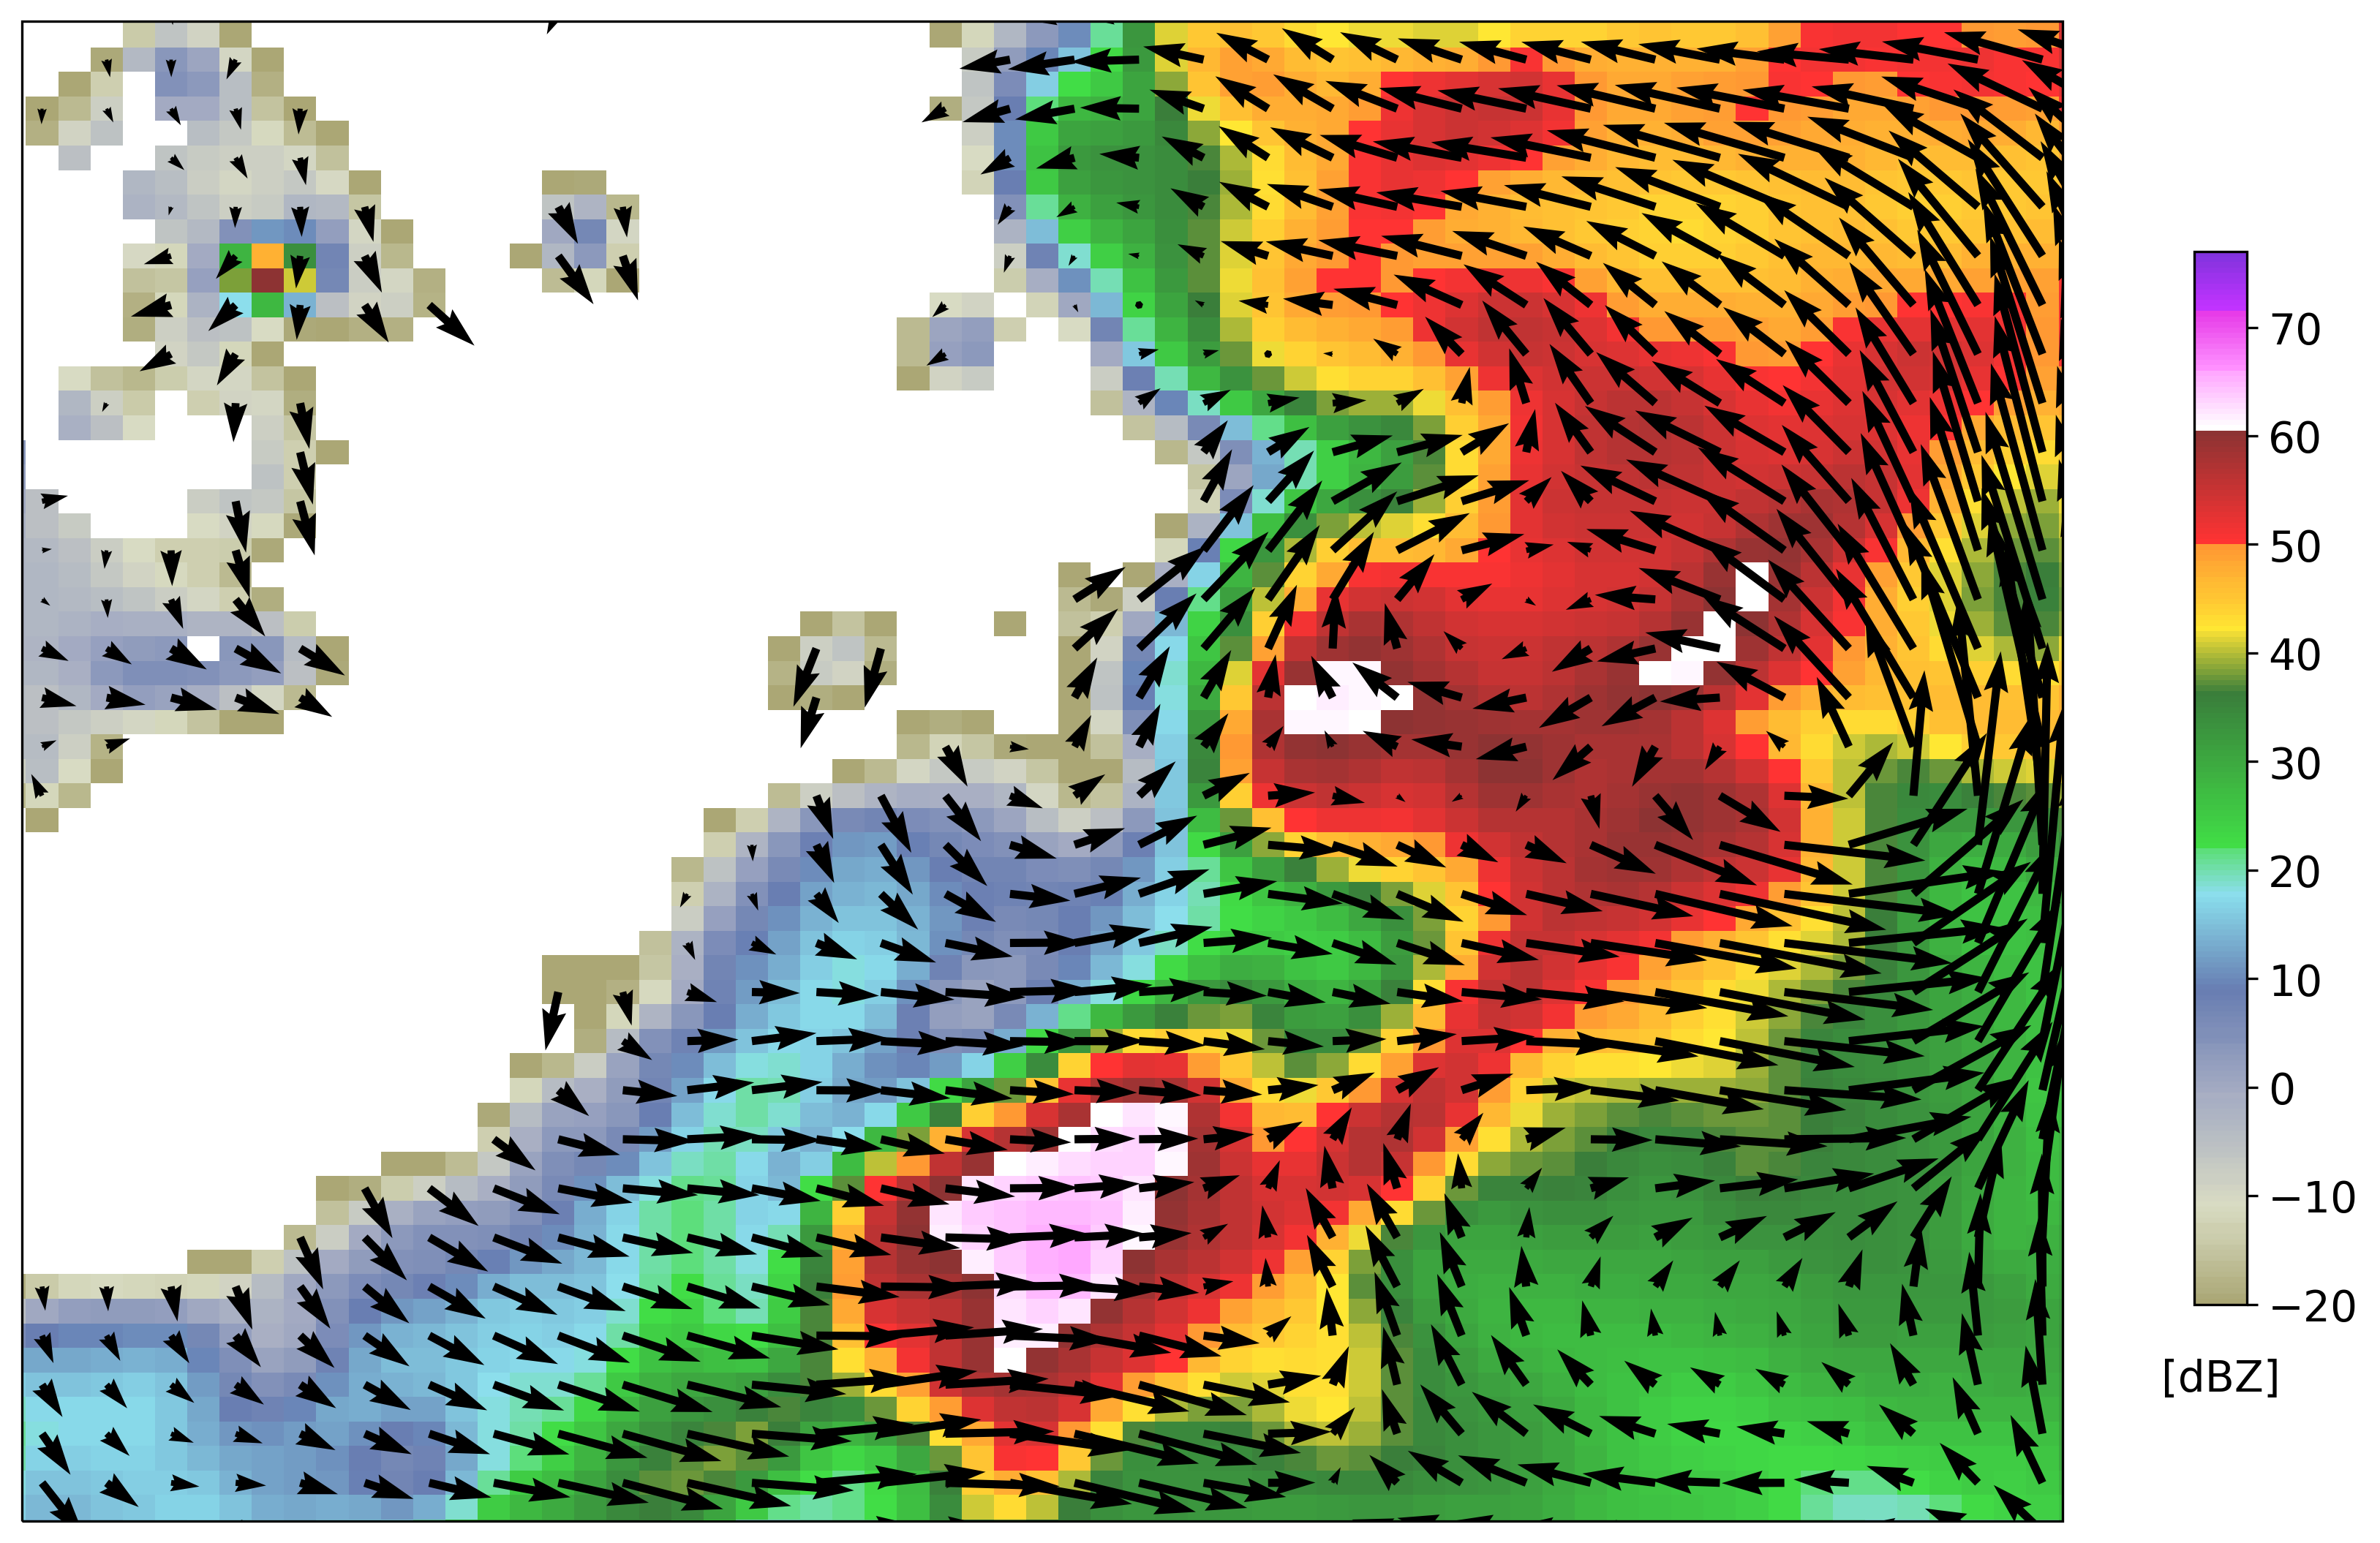

In [34]:
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.PlateCarree())
    
ext = 0.02    
ax.set_extent([np.min(lon)+ext, np.max(lon)-ext, np.min(lat)+ext, np.max(lat)-ext], crs=ccrs.PlateCarree())
    
cf1 = ax.pcolormesh( plotting_lon, plotting_lat, dbz_goodcondition
                    , cmap=ref_cmap, norm=ref_norm
                    , alpha=0.8
                    , shading='auto'
                    , transform=ccrs.PlateCarree() 
                    )
step = 2
cf_q = ax.quiver( plotting_lon[::step], plotting_lat[::step]
                    , u_goodcondition[::step, ::step], v_goodcondition[::step, ::step]
                    , scale=200
                    , width=0.004
                    , color='k'
                    , transform=ccrs.PlateCarree() 
                    )
cbar_ax = fig.add_axes([0.95, 0.3, 0.02, 0.4])
cbar = fig.colorbar(cf1, cax=cbar_ax, fraction=0.04)
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_title('[dBZ]', fontsize=14, y=-0.1)